In [1]:
ModelsDir = '/home/kate/Research/Property/Models/'
ModelName='tmp_XGB_Class'

In [2]:
import pandas as pd
import numpy as np
import pickle
import xgboost as xgb
import math

In [3]:
data = pd.read_csv('/home/kate/Research/Property/Data/EDA_FI_dataset.csv', error_bad_lines=False, index_col=False)

In [4]:
featureset  = [
 'stories', 
 'units', 
 'multipolicyind', 
 'functionalreplacementcost', 
 'landlordind', 
 'burglaryalarmtype', 
 'propertymanager', 
 'gatedcommunityind', 
 'replacementcostdwellingind', 
 'equipmentbreakdown', 
 'cova_deductible', 
 'water_risk_sev_3_blk', 
 'fixture_leak_3_blk', 
 'rep_cost_3_blk', 
 'sqft', 
 'waterded', 
 'constructioncd_encd', 
 'multipolicyindumbrella', 
 'usagetype_encd', 
 'homegardcreditind', 
 'rentersinsurance', 
 'waterdetectiondevice', 
 'safeguardplusind', 
 'deadboltind', 
 'replacementvalueind', 
 'numberoffamilies', 
 'water_risk_fre_3_blk', 
 'pipe_froze_3_blk', 
 'ustructure_fail_3_blk', 
 'customer_cnt_active_policies_binned', 
 'ecy', 
 'yearbuilt', 
 'roofcd_encd', 
 'occupancy_encd', 
 'protectionclass', 
 'fire_risk_model_score', 
 'earthquakeumbrellaind', 
 'ordinanceorlawpct', 
 'sprinklersystem', 
 'firealarmtype', 
 'neighborhoodcrimewatchind', 
 'kitchenfireextinguisherind', 
 'poolind', 
 'serviceline', 
 'cova_limit', 
 'water_risk_3_blk', 
 'appl_fail_3_blk', 
 'plumb_leak_3_blk', 
 'waterh_fail_3_blk'
]

In [5]:
target_column = 'hasclaim'
prediction_column = 'pred'

In [6]:
X=data[featureset]
y=data[target_column]
Dtrain = xgb.DMatrix(X.values,y)

In [7]:
nrounds = 5000
esr=100
kfold=5
xgb_params = {
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'silent': True,
        'booster': 'gbtree',
        'seed': 42,
        'scale_pos_weight':0.3,
        'colsample_bylevel': 0.8,
        'colsample_bytree': 0.8,
        'eta': 0.01,
        'max_depth': 6}

In [8]:
xgb_model = xgb.train(xgb_params, Dtrain, nrounds)
xgb_model_file='%s%s.model'%(ModelsDir,ModelName)
pickle.dump(xgb_model, open(xgb_model_file, 'wb'))

In [9]:
data[prediction_column]=  xgb_model.predict(Dtrain, ntree_limit=xgb_model.best_ntree_limit+50)  

In [10]:
fmap_filename='%s/%s.fmap'%(ModelsDir,ModelName)
outfile = open(fmap_filename, 'w')
for i, feat in enumerate(featureset):
    outfile.write('{0}\t{1}\tq\n'.format(i, feat))
outfile.close()

In [11]:
#feature importance
feat_imp = pd.Series(xgb_model.get_score(fmap=fmap_filename,importance_type='weight')).to_frame()
feat_imp.columns=['Weight']
feat_imp = feat_imp.join(pd.Series(xgb_model.get_score(fmap=fmap_filename,importance_type='gain')).to_frame())
feat_imp.columns=['Weight','Gain']
feat_imp = feat_imp.join(pd.Series(xgb_model.get_score(fmap=fmap_filename,importance_type='cover')).to_frame())
feat_imp.columns=['Weight','Gain','Cover']
#feat_imp['fold']=i
feat_imp['FeatureName'] = feat_imp.index
feat_imp['ModelName'] = ModelName
#feat_imp_all = feat_imp_all.append(feat_imp, ignore_index=True)
feat_imp.sort_values(by=['Gain'], ascending=False)

,Weight,Gain,Cover,FeatureName,ModelName
usagetype_encd,2665,4.543677,8801.158309,usagetype_encd,tmp_XGB_Class
customer_cnt_active_policies_binned,1520,4.192398,2612.005409,customer_cnt_active_policies_binned,tmp_XGB_Class
ecy,20424,4.095145,2984.471424,ecy,tmp_XGB_Class
cova_deductible,4968,3.714126,3605.500513,cova_deductible,tmp_XGB_Class
yearbuilt,16185,2.365337,1699.176706,yearbuilt,tmp_XGB_Class
landlordind,454,2.006281,807.152587,landlordind,tmp_XGB_Class
pipe_froze_3_blk,3983,1.687517,618.650110,pipe_froze_3_blk,tmp_XGB_Class
roofcd_encd,3645,1.625080,898.171355,roofcd_encd,tmp_XGB_Class
sqft,11046,1.535138,579.667779,sqft,tmp_XGB_Class
firealarmtype,1528,1.492261,777.513049,firealarmtype,tmp_XGB_Class


In [14]:
# from https://xiaoxiaowang87.github.io/monotonicity_constraint/
def partial_dependency(model, X,  feature):

    """
    Calculate the dependency (or partial dependency) of a response variable on a predictor (or multiple predictors)
    1. Sample a grid of values of a predictor for numeric continuous or all unique values for categorical or discrete continuous.
    2. For each value, replace every row of that predictor with this value, calculate the average prediction.
    """

    X_temp = X.copy()
    
    if feature in ['sqft','yearbuilt','water_risk_sev_3_blk', 'water_risk_3_blk','water_risk_fre_3_blk','ecy']:
        # continuous
        grid = np.linspace(np.percentile(X_temp[feature], 0.1),
                       np.percentile(X_temp[feature], 99.5),
                       50)
    else:
        #categorical
        grid = X_temp[feature].unique()

    y_pred = np.zeros(len(grid))

    for i, val in enumerate(grid):
        X_temp[feature] = val
        d_temp=xgb.DMatrix(X_temp.values)
        y_pred[i] = np.average(model.predict(d_temp,ntree_limit=model.best_ntree_limit+50))


    return grid, y_pred

In [15]:
pd_features = [ 'usagetype_encd',
 'customer_cnt_active_policies_binned',
 'ecy',
 'cova_deductible',
 'yearbuilt',
 'landlordind',
 'pipe_froze_3_blk',
 'roofcd_encd',
 'sqft',
 'firealarmtype',
 'stories',
 'equipmentbreakdown',
 'cova_limit',
 'replacementvalueind',
 'propertymanager',
 'multipolicyind',
 'poolind',
 'replacementcostdwellingind',
 'safeguardplusind',
 'ustructure_fail_3_blk',
 'water_risk_3_blk',
 'serviceline',
 'protectionclass',
 'water_risk_fre_3_blk',
 'rep_cost_3_blk',
 'waterh_fail_3_blk',
 'deadboltind',
 'homegardcreditind',
 'ordinanceorlawpct',
 'occupancy_encd',
 'burglaryalarmtype',
 'waterded',
 'plumb_leak_3_blk',
 'appl_fail_3_blk',
 'numberoffamilies',
 'units',
 'water_risk_sev_3_blk',
 'multipolicyindumbrella',
 'kitchenfireextinguisherind',
 'fixture_leak_3_blk',
 'constructioncd_encd',
 'fire_risk_model_score',
 'gatedcommunityind',
 'sprinklersystem',
 'neighborhoodcrimewatchind',
 'rentersinsurance',
 'earthquakeumbrellaind',
 'functionalreplacementcost'
]

In [16]:
all_fm_pd = pd.DataFrame()
for f in pd_features:
    print('Processing:%s'%f)
    grid, y_pred = partial_dependency(xgb_model,X,f)
    fm_pd=pd.concat([pd.Series(grid), pd.Series(y_pred)], axis=1)
    fm_pd.columns=['value','pd']
    fm_pd['feature']=f
    all_fm_pd=all_fm_pd.append(fm_pd)
    all_fm_pd.to_csv('%s%s_PartialDependency.csv'%(ModelsDir,ModelName),header=True,index=False);

Processing:usagetype_encd
Processing:customer_cnt_active_policies_binned
Processing:ecy
Processing:cova_deductible
Processing:yearbuilt
Processing:landlordind
Processing:pipe_froze_3_blk
Processing:roofcd_encd
Processing:sqft
Processing:firealarmtype
Processing:stories
Processing:equipmentbreakdown
Processing:cova_limit
Processing:replacementvalueind
Processing:propertymanager
Processing:multipolicyind
Processing:poolind
Processing:replacementcostdwellingind
Processing:safeguardplusind
Processing:ustructure_fail_3_blk
Processing:water_risk_3_blk
Processing:serviceline
Processing:protectionclass
Processing:water_risk_fre_3_blk
Processing:rep_cost_3_blk
Processing:waterh_fail_3_blk
Processing:deadboltind
Processing:homegardcreditind
Processing:ordinanceorlawpct
Processing:occupancy_encd
Processing:burglaryalarmtype
Processing:waterded
Processing:plumb_leak_3_blk
Processing:appl_fail_3_blk
Processing:numberoffamilies
Processing:units
Processing:water_risk_sev_3_blk
Processing:multipolicyi

In [17]:
%matplotlib inline

/home/kate/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


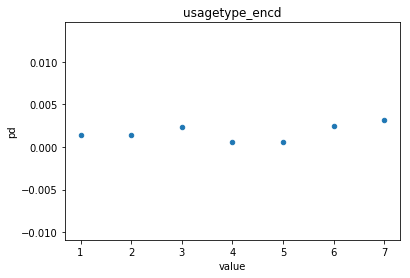

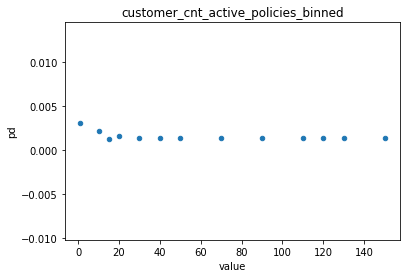

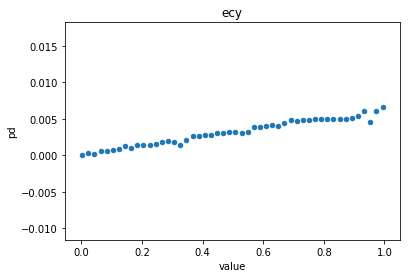

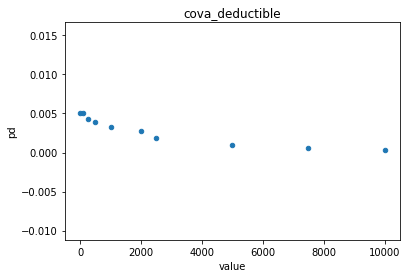

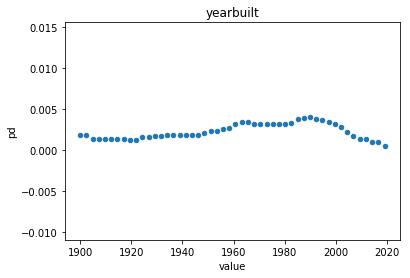

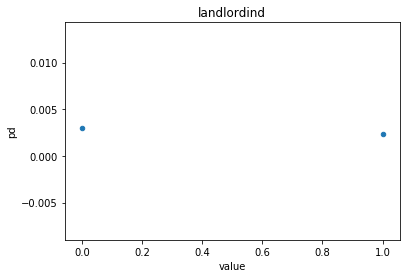

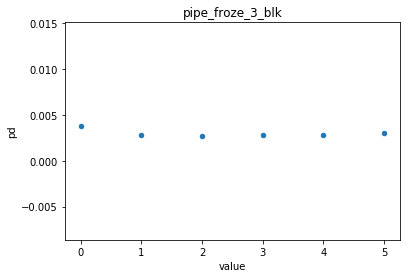

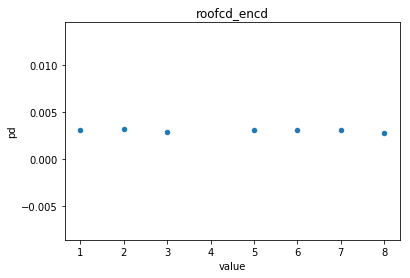

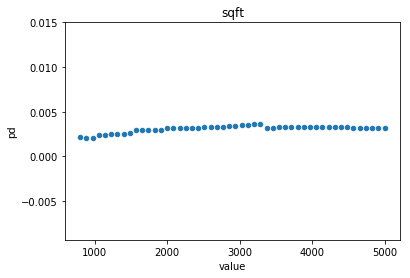

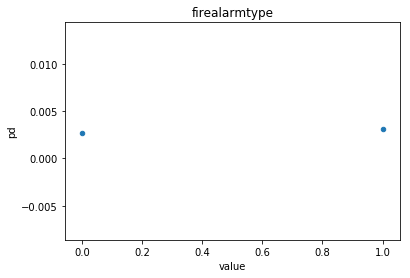

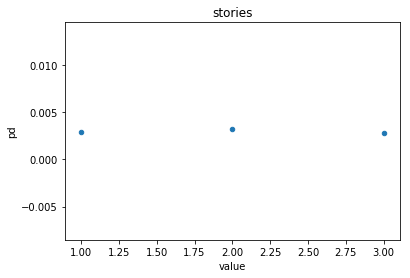

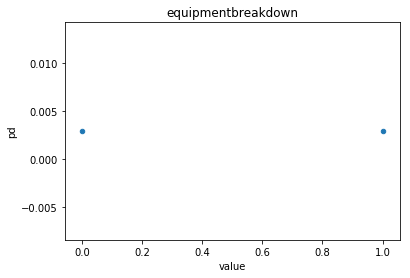

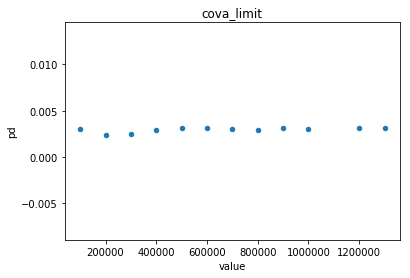

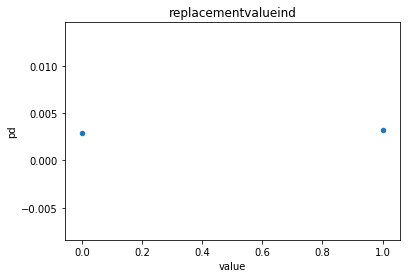

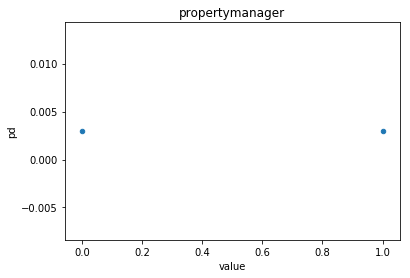

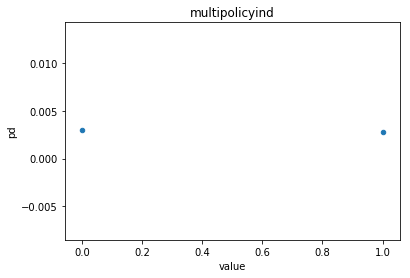

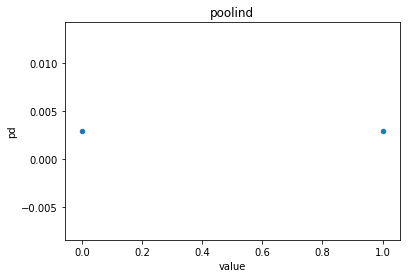

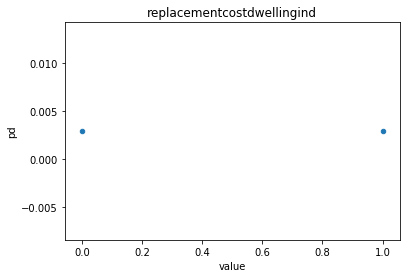

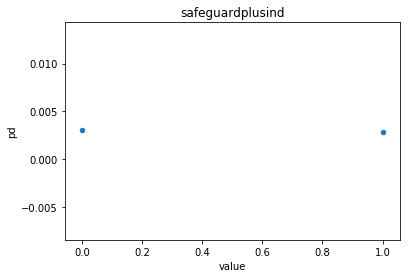

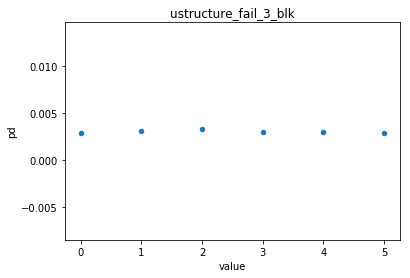

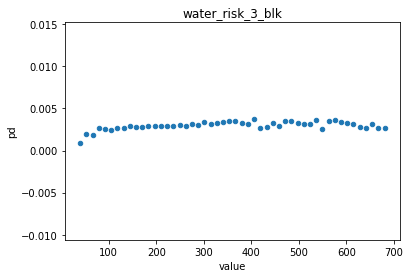

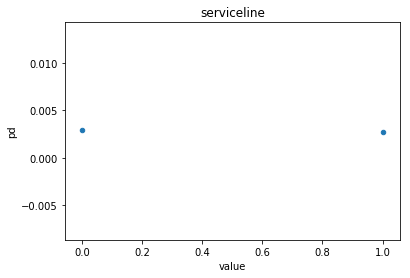

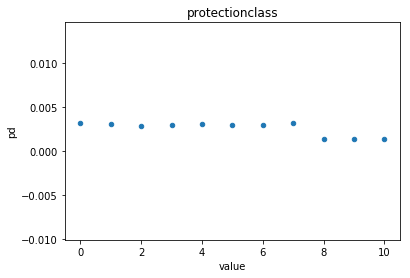

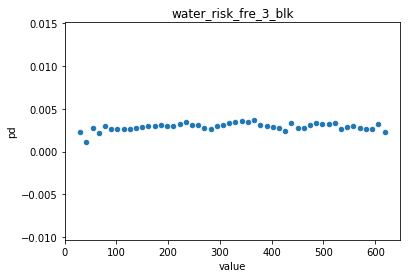

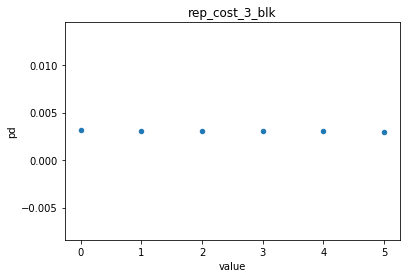

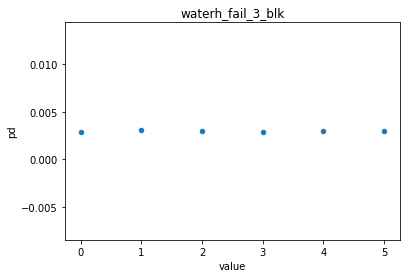

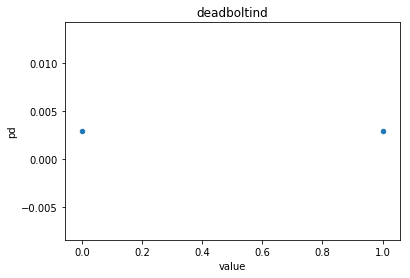

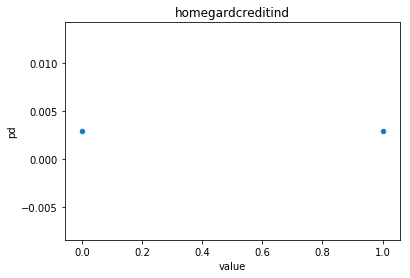

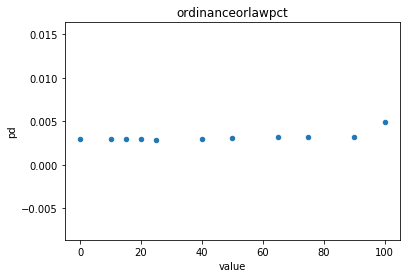

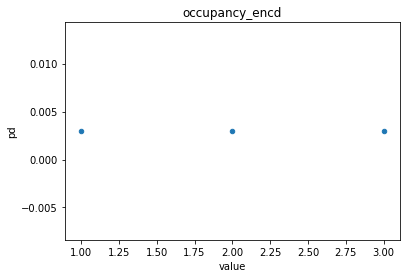

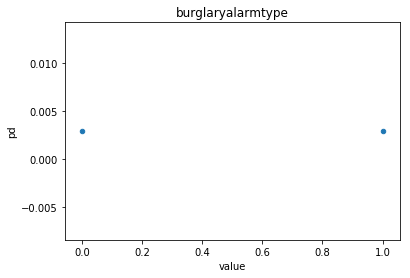

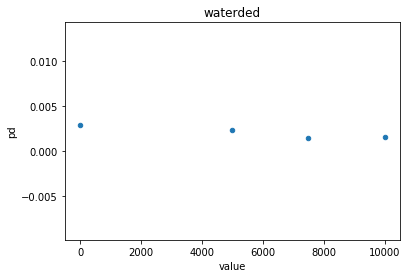

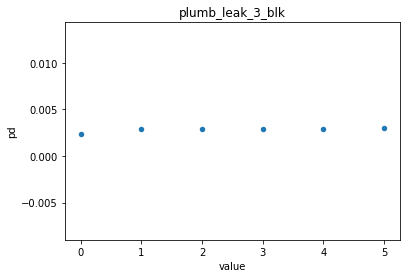

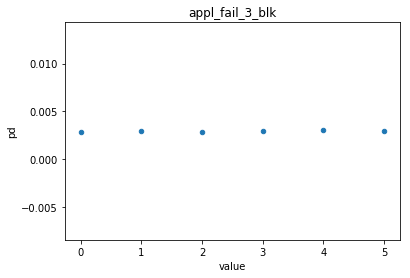

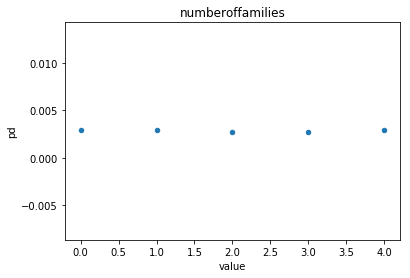

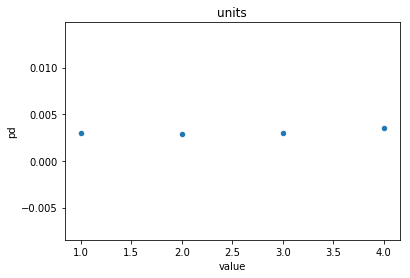

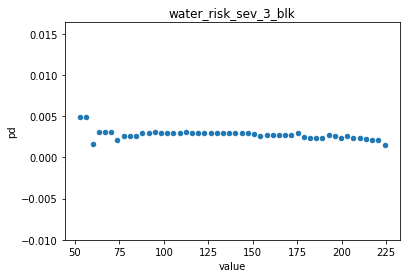

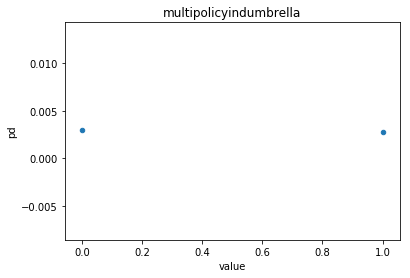

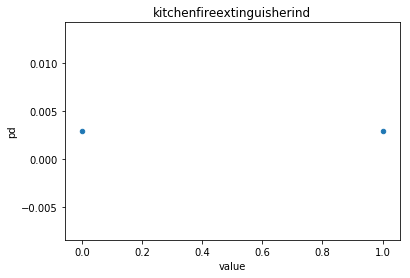

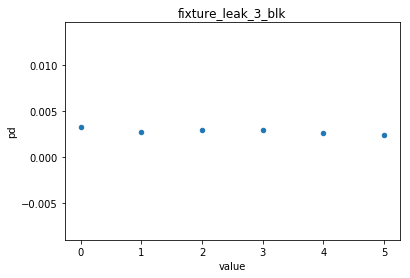

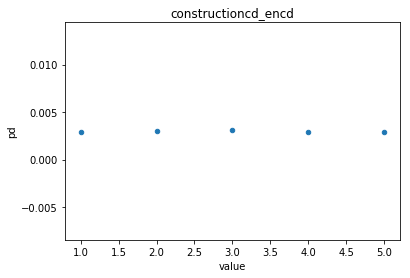

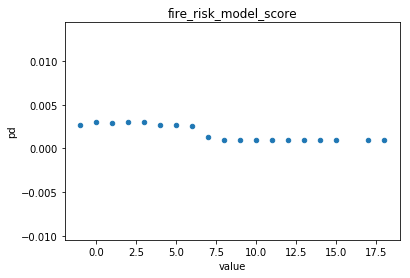

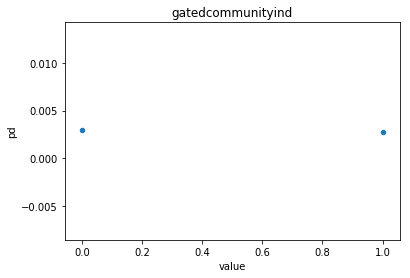

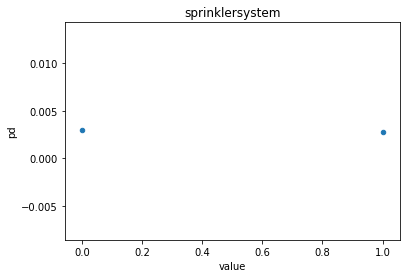

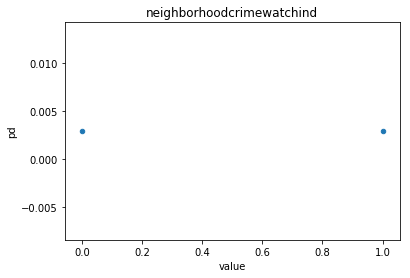

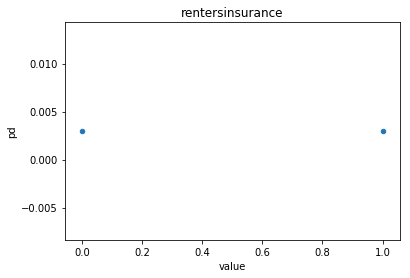

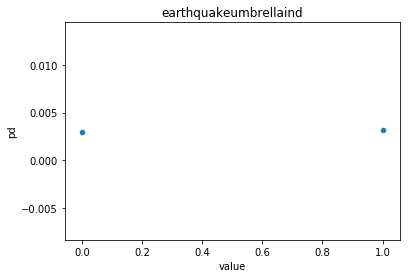

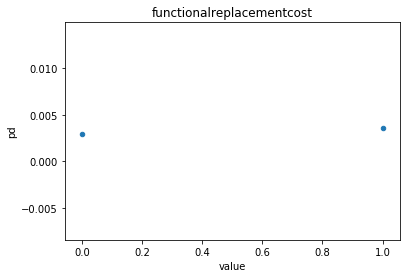

In [18]:
for f in pd_features:
    all_fm_pd[all_fm_pd['feature']==f].plot(kind='scatter',x='value', y='pd', title=f)

In [19]:
for f in pd_features:
    print(all_fm_pd[all_fm_pd['feature']==f])

   value        pd         feature
0    6.0  0.002502  usagetype_encd
1    3.0  0.002365  usagetype_encd
2    7.0  0.003198  usagetype_encd
3    2.0  0.001376  usagetype_encd
4    4.0  0.000557  usagetype_encd
5    5.0  0.000559  usagetype_encd
6    1.0  0.001376  usagetype_encd
    value        pd                              feature
0     1.0  0.003063  customer_cnt_active_policies_binned
1    10.0  0.002142  customer_cnt_active_policies_binned
2    15.0  0.001193  customer_cnt_active_policies_binned
3    20.0  0.001616  customer_cnt_active_policies_binned
4    30.0  0.001349  customer_cnt_active_policies_binned
5    40.0  0.001349  customer_cnt_active_policies_binned
6   110.0  0.001349  customer_cnt_active_policies_binned
7    70.0  0.001349  customer_cnt_active_policies_binned
8    50.0  0.001349  customer_cnt_active_policies_binned
9   130.0  0.001349  customer_cnt_active_policies_binned
10  150.0  0.001349  customer_cnt_active_policies_binned
11   90.0  0.001349  customer_cnt_ac